#Beta Hedging

Beta hedging is an advanced investment strategy that seeks to reduce the risk associated with the volatility, or beta, of a portfolio. Beta is a measure of how an individual asset or portfolio moves (i.e., its volatility) compared to the market as a whole.

A beta of 1 indicates that the asset or portfolio is expected to move with the market. A beta greater than 1 indicates that the asset or portfolio is more volatile than the market, and a beta less than 1 means it is less volatile.

Beta hedging involves taking a position in a security that has a beta with respect to a benchmark index and then taking an opposite position in the benchmark index. The goal is to create a net beta of zero, which means that the portfolio's return is expected to be independent of the benchmark index's performance.

#Beta & Factor Models


Factor models are a way of explaining the returns of one asset via a linear combination of the returns of other assets. The general form of a factor model is: $$𝐘 = α + β_1𝚇_1 + ... + β_n 𝚇_n$$
This is analogous to linear regression in $n+1$ variables. The vector $X = [𝚇_1,...,𝚇_n]$    could represent about any economic data point however in our case it can be assumed to be assets, indicators and etc.  

In this context, the *beta* is refering to a constant value which is defined by one assets "relationship degree" to another asset, which is just the vector $β = [β_1, ... ,β_n]$. For example suppose we wanna "fit" a linear regression of Tesla's price to the overall price of S&P 500, then in our model where $Y$ represents Tesla's price, and $X$ represents S&P 500's price, we have that $Y = α + βX$. $β$ here is exactly the amount of "beta exposure" Teslas has to S&P 500.

In [1]:
# Import libraries
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

In [2]:
import yfinance as yf

In [3]:
start = '2014-01-01'
end = '2015-01-01'

In [5]:
assets = yf.download('TSLA', start = start, end=end)
benchmark = yf.download('SPY', start = start, end= end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
# We have to take the percent changes to get to returns
r_a = assets['Close'].pct_change()
r_b = benchmark['Close'].pct_change()

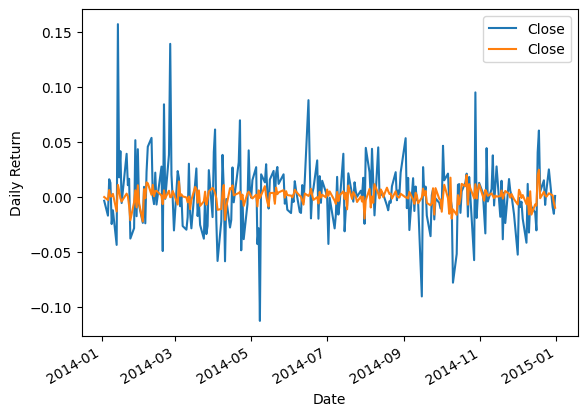

In [13]:
# Let's plot them
r_a.plot()
r_b.plot()
plt.ylabel("Daily Return")
plt.legend();

Now we can perform the regression to find $α$ and $β$ in our model.

In [29]:
# Let's define everything in familiar regression terms
X = r_b.values[1:] # Get just the values, ignore the timestamps
Y = r_a.values[1:]

In [30]:
def linreg(x,y):
  # Add a const for the intercept (alpha) in our regression
  # It's equivalent to adding a column of 1s to our input data
  x = sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  #we remove the intercept aka the constant defined earlier since we dont need it
  x = x[:,1]
  return model.params[0], model.params[1]


In [31]:
alpha, beta = linreg(X, Y)
print('Alpha: ', str(alpha))
print('Beta: ', str(beta))

Alpha:  0.001067927775812867
Beta:  1.9533684935756634


Now we have to plot the line which we tried to fit, i.e. $α + β𝑋$

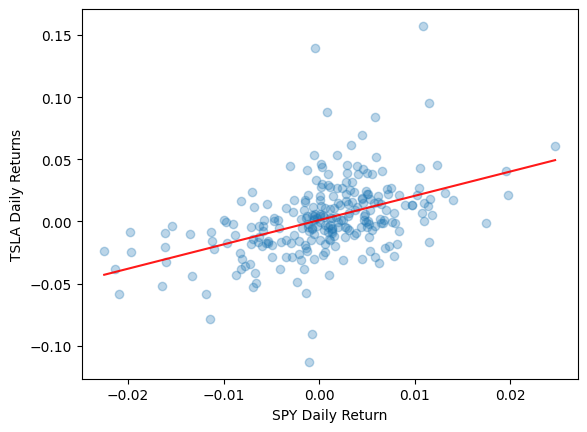

In [32]:
input_X = np.linspace(X.min(),X.max(), 100)
pred = alpha + beta * input_X

#Plot the raw data
plt.scatter(X, Y, alpha=0.3)
plt.xlabel("SPY Daily Return")
plt.ylabel("TSLA Daily Returns")

#Plot the line which is supposed to be the fit
plt.plot(input_X, pred, 'r', alpha=0.9)

#Risk Exposure and Risk Managment